<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(style='darkgrid')
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/sensor_ml.csv", index_col="id")
# sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [3]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,1,1,0,2022-11-02 15:32:49.476340
2,1,1,1,0,2022-11-02 15:32:49.550645
3,1,1,1,0,2022-11-02 15:32:49.646049
4,1,1,1,0,2022-11-02 15:32:49.725031
5,1,1,1,0,2022-11-02 15:32:49.781392
...,...,...,...,...,...
11089,1,0,1,0,2022-11-02 15:45:40.498574
11090,1,0,1,0,2022-11-02 15:45:40.630053
11091,1,0,1,0,2022-11-02 15:45:40.756503


In [4]:
sensor_df.shape

(11093, 5)

In [ ]:
pd.__version__

'1.3.5'

In [5]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at                  chan_1
2022-11-02 15:32:49.476340  1         1
2022-11-02 15:32:49.550645  1         1
2022-11-02 15:32:49.646049  1         1
2022-11-02 15:32:49.725031  1         1
2022-11-02 15:32:49.781392  1         1
                                     ..
2022-11-02 15:45:40.498574  1         1
2022-11-02 15:45:40.630053  1         1
2022-11-02 15:45:40.756503  1         1
2022-11-02 15:45:41.189939  1         1
2022-11-02 15:45:41.348747  1         1
Name: chan_1, Length: 11093, dtype: int64

In [6]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at                  chan_2
2022-11-02 15:32:49.476340  1         1
2022-11-02 15:32:49.550645  1         1
2022-11-02 15:32:49.646049  1         1
2022-11-02 15:32:49.725031  1         1
2022-11-02 15:32:49.781392  1         1
                                     ..
2022-11-02 15:45:40.498574  0         1
2022-11-02 15:45:40.630053  0         1
2022-11-02 15:45:40.756503  0         1
2022-11-02 15:45:41.189939  0         1
2022-11-02 15:45:41.348747  0         1
Name: chan_2, Length: 11093, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at                  chan_3
2022-11-02 15:32:49.476340  1         1
2022-11-02 15:32:49.550645  1         1
2022-11-02 15:32:49.646049  1         1
2022-11-02 15:32:49.725031  1         1
2022-11-02 15:32:49.781392  1         1
                                     ..
2022-11-02 15:45:40.498574  1         1
2022-11-02 15:45:40.630053  1         1
2022-11-02 15:45:40.756503  1         1
2022-11-02 15:45:41.189939  1         1
2022-11-02 15:45:41.348747  0         1
Name: chan_3, Length: 11093, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at                  chan_4
2022-11-02 15:32:49.476340  0         1
2022-11-02 15:32:49.550645  0         1
2022-11-02 15:32:49.646049  0         1
2022-11-02 15:32:49.725031  0         1
2022-11-02 15:32:49.781392  0         1
                                     ..
2022-11-02 15:45:40.498574  0         1
2022-11-02 15:45:40.630053  0         1
2022-11-02 15:45:40.756503  0         1
2022-11-02 15:45:41.189939  0         1
2022-11-02 15:45:41.348747  0         1
Name: chan_4, Length: 11093, dtype: int64

In [9]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [10]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-02 15:32:49.476340,1,1,1,0
2022-11-02 15:32:49.550645,1,1,1,0
2022-11-02 15:32:49.646049,1,1,1,0
2022-11-02 15:32:49.725031,1,1,1,0
2022-11-02 15:32:49.781392,1,1,1,0
...,...,...,...,...
2022-11-02 15:45:40.498574,1,0,1,0
2022-11-02 15:45:40.630053,1,0,1,0
2022-11-02 15:45:40.756503,1,0,1,0


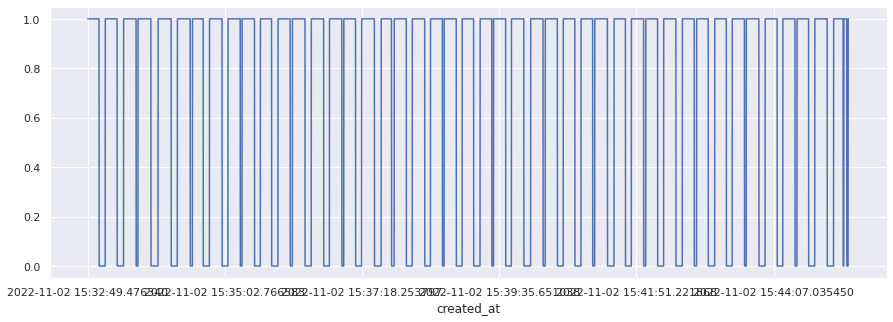

In [11]:
sensor_copy_df["chan_1"].plot()

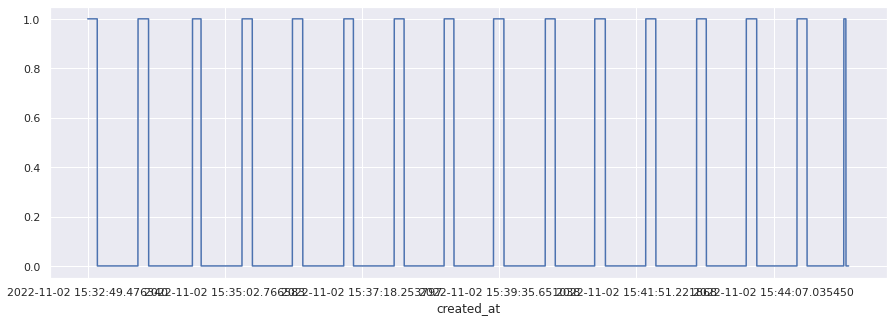

In [12]:
sensor_copy_df["chan_2"].plot()

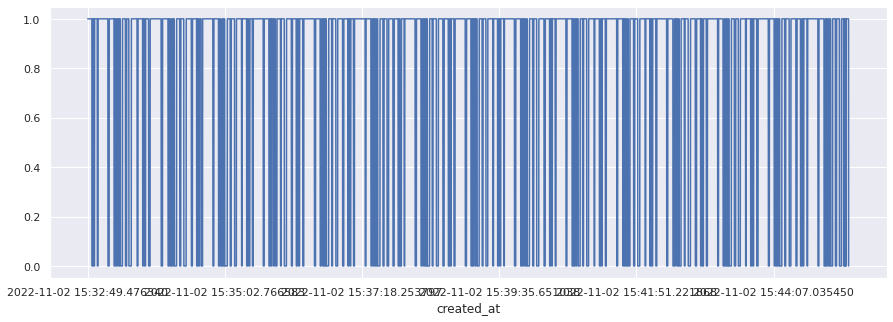

In [13]:
sensor_copy_df["chan_3"].plot()

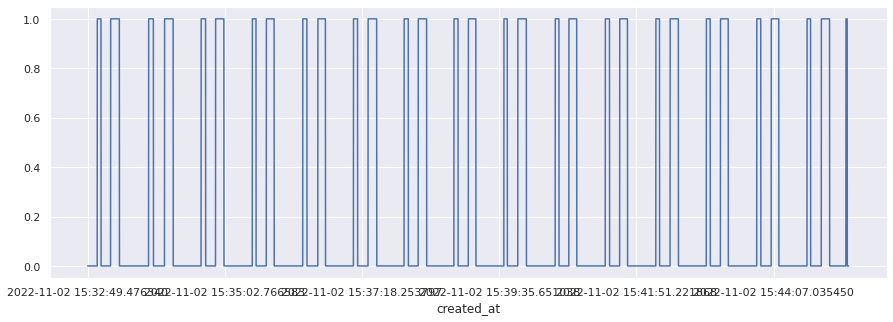

In [14]:
sensor_copy_df["chan_4"].plot()

In [15]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    y.append(df.to_numpy()[window_size+i])
  return np.array(X), np.array(y)

In [16]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((11083, 10, 4), (11083, 4))

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [18]:
def build_model(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [19]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(4433, 10, 4) (4433, 4)
(3325, 10, 4) (3325, 4)
(3325, 10, 4) (3325, 4)


In [20]:
model = build_model((X.shape[1], X.shape[2]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 45)            9000      
                                                                 
 dropout (Dropout)           (None, 10, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 45)                16380     
                                                                 
 dense (Dense)               (None, 8)                 368       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 25,784
Trainable params: 25,784
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/50
148/148 [==============================] - 16s 36ms/step - loss: 0.3196 - binary_accuracy: 0.8693 - val_loss: 0.1977 - val_binary_accuracy: 0.9228
Epoch 2/50
148/148 [==============================] - 2s 17ms/step - loss: 0.1754 - binary_accuracy: 0.9351 - val_loss: 0.1546 - val_binary_accuracy: 0.9489
Epoch 3/50
148/148 [==============================] - 3s 17ms/step - loss: 0.1265 - binary_accuracy: 0.9624 - val_loss: 0.1043 - val_binary_accuracy: 0.9695
Epoch 4/50
148/148 [==============================] - 2s 17ms/step - loss: 0.0936 - binary_accuracy: 0.9737 - val_loss: 0.0935 - val_binary_accuracy: 0.9741
Epoch 5/50
148/148 [==============================] - 3s 17ms/step - loss: 0.0810 - binary_accuracy: 0.9785 - val_loss: 0.0735 - val_binary_accuracy: 0.9792
Epoch 6/50
148/148 [==============================] - 2s 16ms/step - loss: 0.0716 - binary_accuracy: 0.9822 - val_loss: 0.0678 - val_binary_accuracy: 0.9826
Epoch 7/50
148/148 [==============================] - 2s 

Text(0, 0.5, 'accuracy')

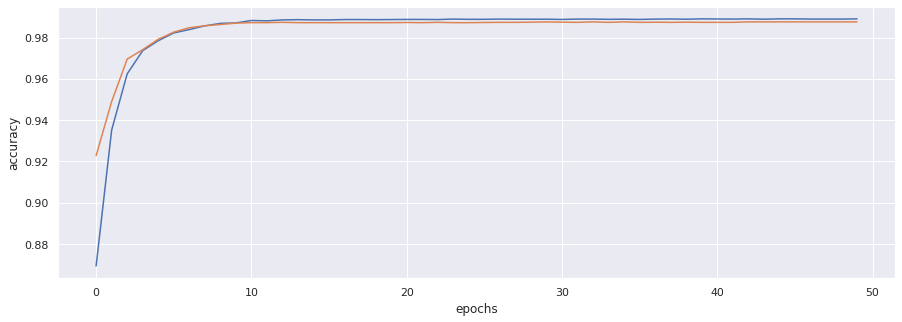

In [23]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

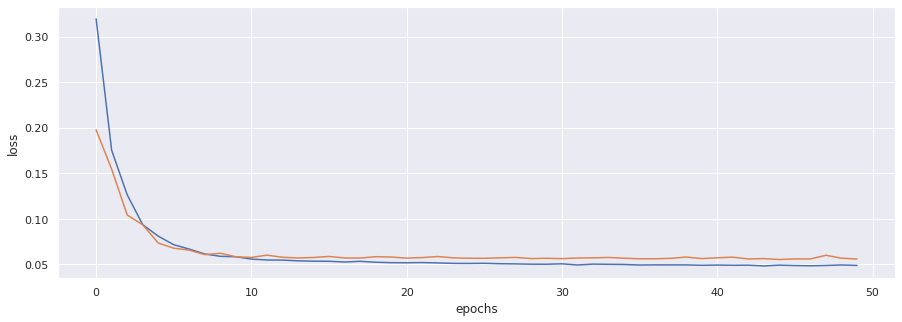

In [24]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [25]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

104/104 [==============================] - 2s 4ms/step


array([[1, 1, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       ...,
       [1, 1, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

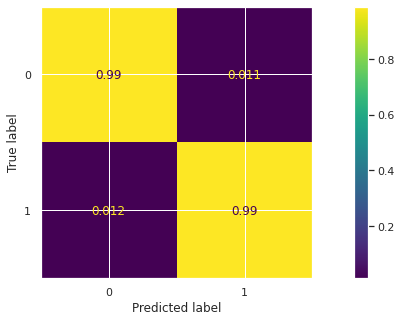

In [26]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

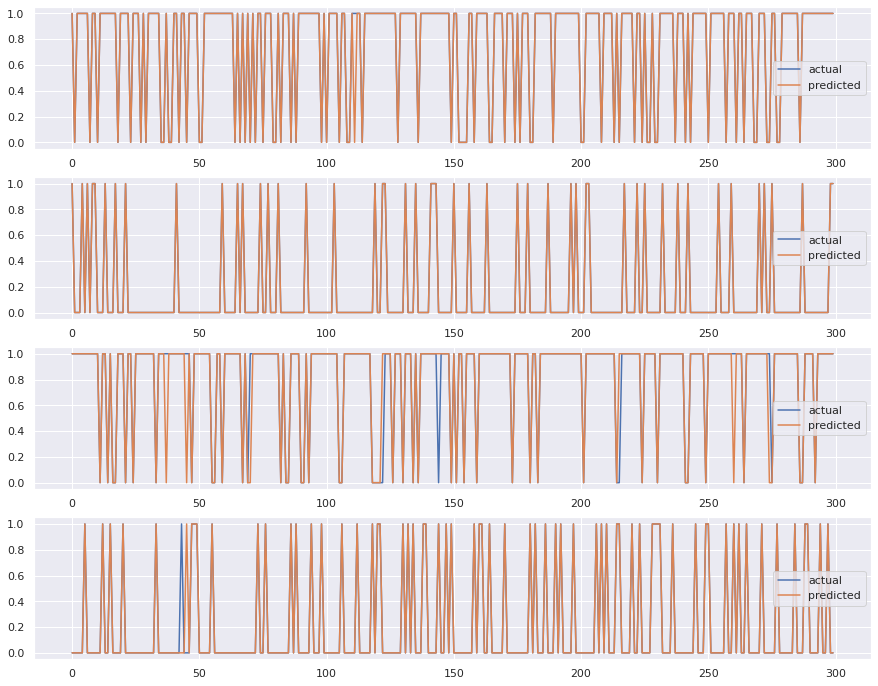

In [49]:
nchannels = y.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y_test[:300, i], label="actual")
  ax[i].plot(test_predictions[:300, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [34]:
def save_model(model, filename="model.tflite"):
  # convert the keras model to tflite
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
  ]

  tflite_model = converter.convert()

  # save the tflite model
  with open(filename, "wb") as f:
    f.write(tflite_model)

In [ ]:
tf.__version__

'2.9.2'

In [35]:
save_model(model)

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [31]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        # print(i, bit)
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
            else:
                # 1,1
                continue
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))

    return np.array(idle_times)

In [32]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if len(j) > 0 and i+j[0][0] <= i else 0 
                       for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [33]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-02 15:32:49.476340,0,0,0,139
2022-11-02 15:32:49.550645,0,0,0,138
2022-11-02 15:32:49.646049,0,0,0,137
2022-11-02 15:32:49.725031,0,0,0,136
2022-11-02 15:32:49.781392,0,0,0,135
...,...,...,...,...
2022-11-02 15:45:40.498574,0,5,0,5
2022-11-02 15:45:40.630053,0,4,0,4
2022-11-02 15:45:40.756503,0,3,0,3


In [36]:
X2, y2 = df_to_X_y(idle_times_df)
X2.shape, y2.shape

((11083, 10, 4), (11083, 4))

In [37]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.6)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((4433, 10, 4), (3325, 10, 4), (3325, 10, 4))

In [38]:
def build_model2(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu")
  ])

In [39]:
model2 = build_model2((X2.shape[1], X2.shape[2]))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 45)            9000      
                                                                 
 dropout_1 (Dropout)         (None, 10, 45)            0         
                                                                 
 lstm_3 (LSTM)               (None, 45)                16380     
                                                                 
 dropout_2 (Dropout)         (None, 45)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                736       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 26,184
Trainable params: 26,184
Non-trai

In [40]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [41]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=40, validation_data=(X2_val, y2_val))

Epoch 1/40
148/148 [==============================] - 8s 24ms/step - loss: 28580.1426 - accuracy: 0.8597 - val_loss: 24450.8867 - val_accuracy: 0.6532
Epoch 2/40
148/148 [==============================] - 3s 17ms/step - loss: 20781.2812 - accuracy: 0.5667 - val_loss: 15956.7637 - val_accuracy: 0.6463
Epoch 3/40
148/148 [==============================] - 2s 17ms/step - loss: 13292.4707 - accuracy: 0.6776 - val_loss: 10488.8574 - val_accuracy: 0.6770
Epoch 4/40
148/148 [==============================] - 2s 17ms/step - loss: 9156.6230 - accuracy: 0.7361 - val_loss: 7207.0645 - val_accuracy: 0.7777
Epoch 5/40
148/148 [==============================] - 2s 16ms/step - loss: 6382.1211 - accuracy: 0.8078 - val_loss: 4775.5503 - val_accuracy: 0.8499
Epoch 6/40
148/148 [==============================] - 2s 17ms/step - loss: 4008.0217 - accuracy: 0.8750 - val_loss: 2595.8674 - val_accuracy: 0.9420
Epoch 7/40
148/148 [==============================] - 2s 17ms/step - loss: 2371.8984 - accuracy: 0.9

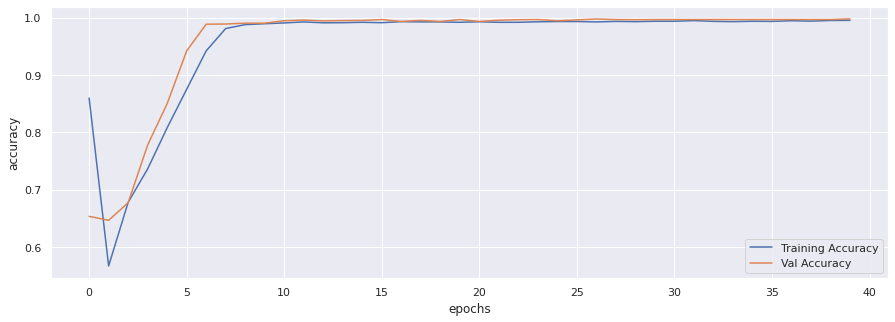

In [42]:
plt.plot(history2.history["accuracy"], label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

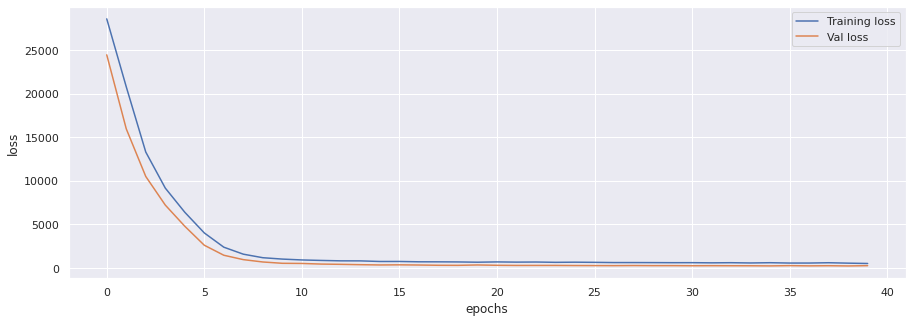

In [43]:
plt.plot(history2.history["loss"], label="Training loss")
plt.plot(history2.history["val_loss"], label="Val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [44]:
test_preds = model2.predict(X2_test)
test_preds

104/104 [==============================] - 1s 5ms/step


array([[  5.562655 ,  87.57231  ,   3.936447 , 236.00616  ],
       [ 27.032085 , 562.6133   ,   2.37174  ,   0.       ],
       [ 10.439856 , 297.73608  ,   2.6160686,   0.       ],
       ...,
       [ 11.71589  , 178.4694   ,   5.640004 , 323.33743  ],
       [ 10.553417 , 310.3829   ,   2.7568367,   0.       ],
       [  6.73288  , 106.503784 ,   4.2557826, 252.56958  ]],
      dtype=float32)

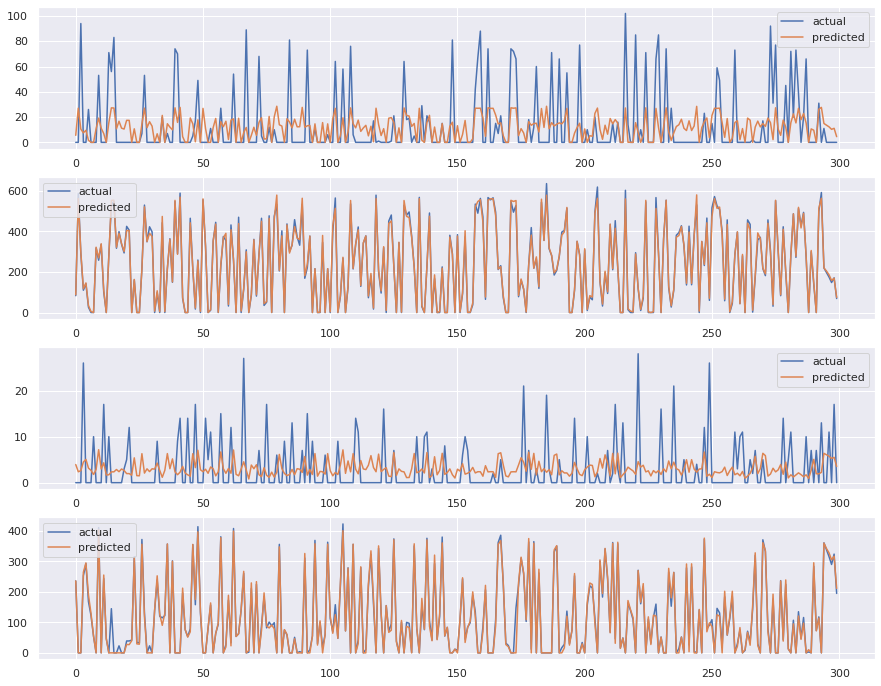

In [48]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:300, i], label="actual")
  ax[i].plot(test_preds[:300, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [50]:
save_model(model2, "model2.tflite")